# Minimization of Energy Consumption of Wireless Sensor Networks using Fuzzy Logic


Meminimalisasi Konsumsi Energi dari Wireless Sensor Networks menggunakan Fuzzy Logic

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

INPUT :
1. Energy
   Dibagi menjadi 3 Bagian :
   
    - Low ( 0.1 - 0.5 Watt )
    - Medium ( 0.2 - 0.8 Watt )
    - High ( 0.5 - 1 Watt )
    
    
2. Distance
   Dibagi menjadi 3 Bagian : 
   
    - Near ( 50 - 80 Meter)
    - Medium ( 80 - 110 Meter )
    - Far ( 110 - 150 Meter )
    
OUTPUT :

Priority
  Dibagi menjadi 5 Bagian :
   - v-Low ( 10 - 30 )
   - Low ( 20 - 60 )
   - Medium ( 45 - 105 )
   - High ( 90 - 130 )
   - v-High ( 120 - 150 )

Energi dari Wireless Sensor Network mempunyai rentang nilai antar 0.1 - 1 Watt

In [2]:
energy = ctrl.Antecedent(np.arange(0.1,1,0.1),'energy')
energyz = np.arange(0.1,1,0.1)

# Fuzzifikasi Energy

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Energy Consumption, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Energy $$
$$ Low = 0.1 Watt - 0.5 Watt$$
$$ Medium = 0.2 Watt - 0.8 Watt$$
$$ High = 0.5 Watt - 1 Watt$$



Dengan fungsi keanggotaan energy

\begin{equation}
  energy['low'] = \mu EnergyLow(x)=\begin{cases}
    1, & \text{$0.1\leq x \leq 0.2$}.\\
    \left.(0.5 - x) \,  \right/(0.5 - 0.2) , & \text{$0.2 \leq x \leq 0.5$}.\\
    0, & \text{$x\geq 0.2$}.
  \end{cases}
  \\
    energy['medium'] = \mu EnergyMedium(x)=\begin{cases}
    0, & \text{$x\leq 0.2$ atau $x\geq0.8$}.\\
    \left.(x - 0.2)\, \right/(0.5 - 0.2) , & \text{$0.2 \leq x \leq 0.5$}.\\
    \left.(0.8 - x)\, \right/(0.8 - 0.5) , & \text{$0.5 \leq x \leq 0.8$}.\\
  \end{cases}
  \\
  energy['high'] = \mu EnergyHigh(x)=\begin{cases}
    0, & \text{$x \leq 0.5$}.\\
    \left.(x - 0.5) \,  \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 0.8$}.\\
    1, & \text{$x\geq 0.8$}.
  \end{cases}
\end{equation}

In [3]:
energy['low'] = fuzz.trapmf(energy.universe,[0.1,0.1,0.2,0.5])
energy['med'] = fuzz.trimf(energy.universe,[0.2,0.5,0.8])
energy['high'] = fuzz.trapmf(energy.universe,[0.5,0.8,0.9,1])

# Plotting Membership Function "Energy"

Plotting fungsi keanggotaan $\mu Energy Low(x)$

Text(0.5, 1.0, 'Energy Low')

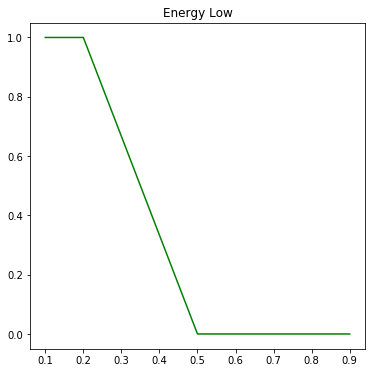

In [4]:
energy_low = fuzz.trapmf(energyz,[0.1, 0.1, 0.2, 0.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(energyz,energy_low,'green')
ax0.set_title('Energy Low')

Plotting fungsi keanggotaan $\mu Energy Medium(x)$

Text(0.5, 1.0, 'Energy Yellow')

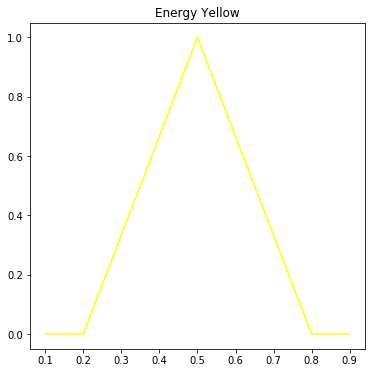

In [5]:
energy_med = fuzz.trimf(energyz,[0.2,0.5,0.8])
fig, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(energyz,energy_med,'yellow')
ax1.set_title('Energy Yellow')

Plotting fungsi keanggotaan $\mu Energy High(x)$

Text(0.5, 1.0, 'Energy High')

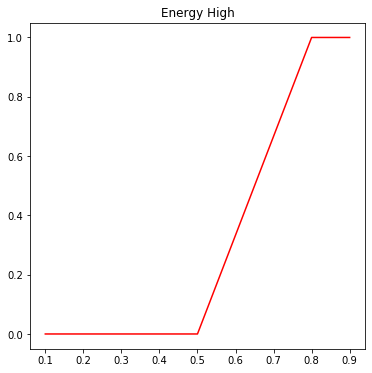

In [6]:
energy_high = fuzz.trapmf(energyz,[0.5,0.8,0.9,1])
fig, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(energyz,energy_high,'red')
ax2.set_title('Energy High')

Plotting ke-3 fungsi keanggotaan dari energy

C:\Users\r00t\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


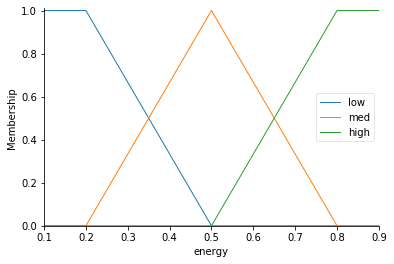

In [7]:
energy.view()

# Fuzzifikasi Distance

In [8]:
distance = ctrl.Antecedent(np.arange(1,150,1),'distance')
distance_x = np.arange(1,150,1)

Dengan fungsi keanggotaan distance

\begin{equation}
  distance['near'] = \mu DistanceNear(x)=\begin{cases}
    1, & \text{$0\leq x\leq45$}.\\
    (80 - x)/(80 - 45) , & \text{$45 \leq x \leq 80$}.\\
    0, & \text{$x\geq 80$}.
  \end{cases}
  \\
  distance['medium'] = \mu DistanceMedium(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq110$}.\\
    (x - 50)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
    (110 - x)/(110 - 80) , & \text{$80 \leq x \leq 110$}.\\
  \end{cases}
  \\
  distance['far'] = \mu DistanceFar(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (x - 80)/(110 - 80) , & \text{$80 \leq x \leq 110$}.\\
    1, & \text{$x\geq 110$}.
  \end{cases}
\end{equation}


In [9]:
distance['near'] = fuzz.trapmf(distance.universe,[1,1,45,80])
distance['med'] = fuzz.trimf(distance.universe,[50,80,110])
distance['far'] = fuzz.trapmf(distance.universe,[80,110,150,150])

# Plotting Membership Function "Distance"

Plotting fungsi keanggotaan $\mu Distance Near(x)$

Text(0.5, 1.0, 'Distance Near')

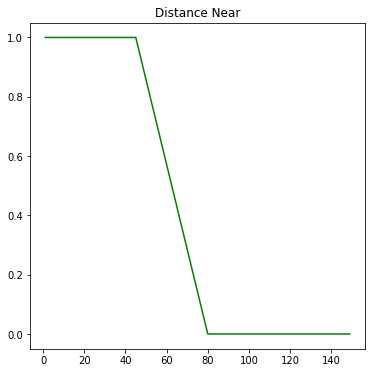

In [10]:
distance_near = fuzz.trapmf(distance_x,[1, 1, 45, 80 ])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(distance_x,distance_near,'green')
ax0.set_title('Distance Near')

Plotting fungsi keanggotaan $\mu Distance Medium(x)$

Text(0.5, 1.0, 'Distance Medium')

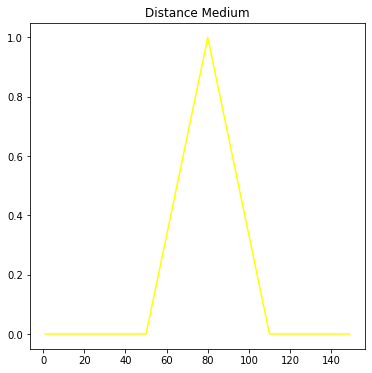

In [11]:
distance_med = fuzz.trimf(distance_x,[50,80,110])
fig, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(distance_x,distance_med,'Yellow')
ax1.set_title('Distance Medium')

Plotting fungsi keanggotaan $\mu Distance Far(x)$

Text(0.5, 1.0, 'Distance Far')

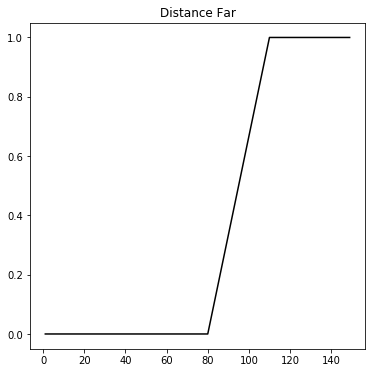

In [12]:
distance_far = fuzz.trapmf(distance_x,[80,110,150,150])
fig, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(distance_x,distance_far,'Black')
ax2.set_title('Distance Far')

Plotting Ke-3 Fungsi Keanggotaan Distance

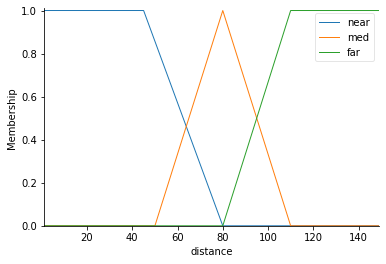

In [13]:
distance.view()

# Fuzifikasi Priority

In [14]:
priority = ctrl.Consequent(np.arange(1,150,1),'priority')
priority_x = np.arange(1,150,1)

Dengan fungsi keanggotaan Priority

\begin{equation}
  priority['v-Low'] = \mu PriorityV-Low(x)=\begin{cases}
    1, & \text{$1\leq x \leq 10$}.\\
    \left.(30 - x) \,  \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    0, & \text{$x\geq 30$}.
  \end{cases}
  \\
  priority['Low'] = \mu PriorityLow(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq60$}.\\
    \left.(x - 20)\, \right/(45 - 20) , & \text{$20 \leq x \leq 45$}.\\
    \left.(60 - x)\, \right/(60 - 45) , & \text{$45 \leq x \leq 60$}.\\
  \end{cases}
  \\
  priority['medium'] = \mu PriorityMedium(x)=\begin{cases}
    0, & \text{$x\leq 45$ atau $x\geq110$}.\\
    \left.(x - 45)\, \right/(75 - 45) , & \text{$45 \leq x \leq 75$}.\\
    \left.(75 - x)\, \right/(110 - 75) , & \text{$75 \leq x \leq 110$}.\\
  \end{cases}
  \\
  priority['high'] = \mu PriorityHigh(x)=\begin{cases}
    0, & \text{$x\leq 90$ atau $x\geq130$}.\\
    \left.(x - 90)\, \right/(110 - 90) , & \text{$90 \leq x \leq 110$}.\\
    \left.(130 - x)\, \right/(130 - 110) , & \text{$110 \leq x \leq 130$}.\\
  \end{cases}
  \\
  priority['v-high'] = \mu PriorityV-High(x)=\begin{cases}
    0, & \text{$x \leq 115$}.\\
    \left.(x - 115) \,  \right/(130 - 115) , & \text{$115 \leq x \leq 130$}.\\
    1, & \text{$x\geq 130$}.
  \end{cases}
\end{equation}

In [15]:
priority['v-low'] = fuzz.trapmf(priority.universe,[1,1,10,30])
priority['low'] = fuzz.trimf(priority.universe,[20,45,60])
priority['med'] = fuzz.trimf(priority.universe,[45,75,110])
priority['high'] = fuzz.trimf(priority.universe,[90,110,130])
priority['v-high'] = fuzz.trapmf(priority.universe,[115,130,150,150])

# Plotting Membership Function "Priority"

Plotting fungsi keanggotaan $\mu PriorityV-Low(x)$

Text(0.5, 1.0, 'Priority v-Low')

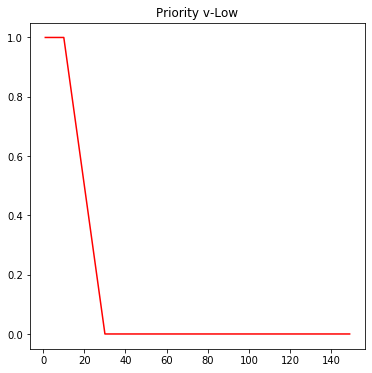

In [16]:
priority_vlow = fuzz.trapmf(priority_x,[1, 1, 10, 30 ])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(priority_x,priority_vlow,'red')
ax0.set_title('Priority v-Low')

Plotting fungsi keanggotaan $\mu PriorityLow(x)$

Text(0.5, 1.0, 'Priority Low')

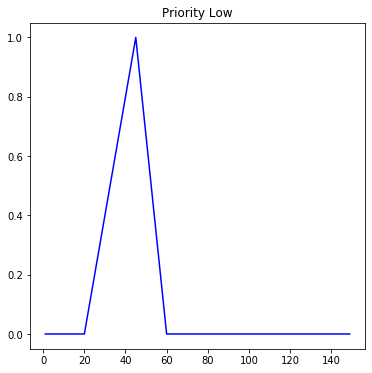

In [17]:
priority_low = fuzz.trimf(priority_x,[20, 45, 60 ])
fig, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(priority_x,priority_low,'blue')
ax1.set_title('Priority Low')

Plotting fungsi keanggotaan $\mu PriorityMedium(x)$

Text(0.5, 1.0, 'Priority Medium')

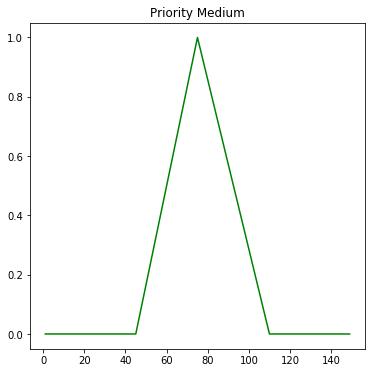

In [18]:
priority_med = fuzz.trimf(priority_x,[45, 75, 110 ])
fig, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(priority_x,priority_med,'green')
ax2.set_title('Priority Medium')

Plotting fungsi keanggotaan $\mu PriorityHigh(x)$

Text(0.5, 1.0, 'Priority high')

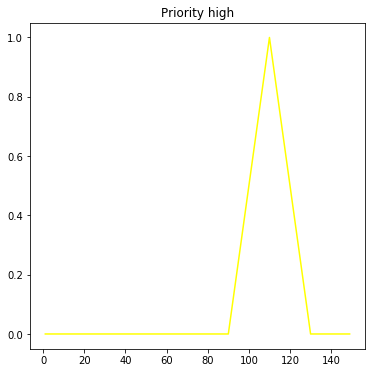

In [19]:
priority_high = fuzz.trimf(priority_x,[90, 110, 130 ])
fig, (ax3) = plt.subplots(nrows=1,figsize=(6,6))
ax3.plot(priority_x,priority_high,'yellow')
ax3.set_title('Priority high')

Plotting fungsi keanggotaan $\mu PriorityV-High(x)$

Text(0.5, 1.0, 'Priority v-High')

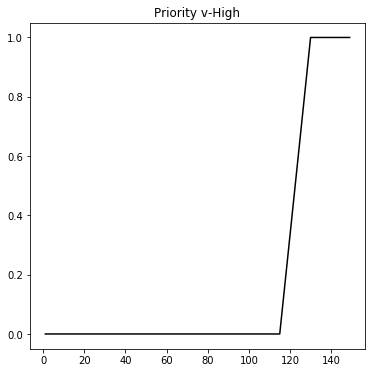

In [20]:
priority_vhigh = fuzz.trapmf(priority_x,[115, 130, 150, 150 ])
fig, (ax4) = plt.subplots(nrows=1,figsize=(6,6))
ax4.plot(priority_x,priority_vhigh,'black')
ax4.set_title('Priority v-High')

Plotting Ke-5 Fungsi Keanggotaan Priority

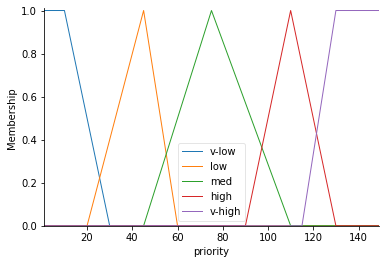

In [21]:
priority.view()

# INFERENCING

Tahapan Fuzzy Rule Base

1. IF Energy LOW AND Distance NEAR THEN Priority MEDIUM
2. IF Energy LOW AND Distance MEDIUM THEN Priority HIGH
3. IF Energy LOW AND Distance FAR THEN Priority v-HIGH
4. IF Energy MEDIUM AND Distance NEAR THEN Priority LOW
5. IF Energy MEDIUM AND Distance MEDIUM THEN Priority MEDIUM
6. IF Energy MEDIUM AND Distance FAR THEN Priority LOW
7. IF Energy HIGH AND Distance NEAR THEN Priority v-LOW
8. IF Energy HIGH AND Distance MEDIUM THEN Priority LOW
9. IF Energy HIGH AND Distance FAR THEN Priority MEDIUM

In [22]:
rule1 = ctrl.Rule(energy['low'] & distance['near'], priority['med'])
rule2 = ctrl.Rule(energy['low'] & distance['med'], priority['high'])
rule3 = ctrl.Rule(energy['low'] & distance['far'], priority['v-high'])

rule4 = ctrl.Rule(energy['med'] & distance['near'], priority['low'])
rule5 = ctrl.Rule(energy['med'] & distance['med'], priority['med'])
rule6 = ctrl.Rule(energy['med'] & distance['far'], priority['low'])

rule7 = ctrl.Rule(energy['high'] & distance['near'], priority['v-low'])
rule8 = ctrl.Rule(energy['high'] & distance['med'], priority['low'])
rule9 = ctrl.Rule(energy['high'] & distance['far'], priority['med'])

# Rule Evaluation

In [23]:
mvmnt_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

# DeFuzzifikasi

In [24]:
mvmnt = ctrl.ControlSystemSimulation(mvmnt_ctrl)

In [25]:
mvmnt.input['energy'] = 0.7
mvmnt.input['distance'] = 45

In [26]:
mvmnt.compute()

In [27]:
print(mvmnt.output['priority'])

24.557142148842313


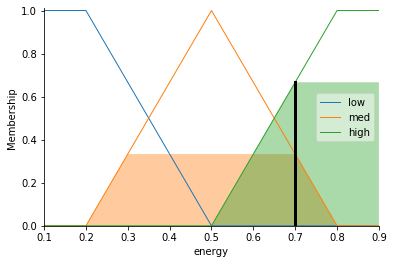

In [28]:
energy.view(sim=mvmnt)

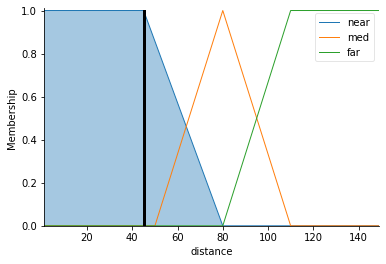

In [29]:
distance.view(sim=mvmnt)

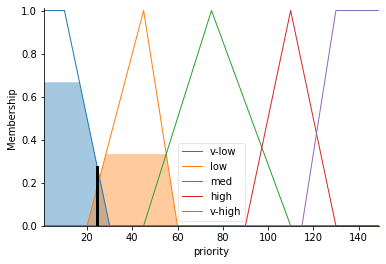

In [30]:
priority.view(sim=mvmnt)

# Penghitungan Manual

\begin{equation}
    Energy = 0.7\\
    Masukkan\,nilai\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,dari\,energy\\
  energy['low'] = \mu EnergyLow(x)=\begin{cases}
    1, & \text{$0.1\leq x \leq 0.2$}.\\
    \left.(0.2 - x) \,  \right/(0.2 - 0.1) , & \text{$0.1 \leq x \leq 0.2$}.\\
    0, & \text{$x\geq 0.2$}.
  \end{cases}
  \\
    energy['medium'] = \mu EnergyMedium(x)=\begin{cases}
    0, & \text{$x\leq 0.2$ atau $x\geq0.8$}.\\
    \left.(x - 0.2)\, \right/(0.5 - 0.2) , & \text{$0.2 \leq x \leq 0.5$}.\\
    \left.(0.8 - 0.7)\, \right/(0.8 - 0.5) , & \text{$0.5 \leq x \leq 0.8$}.\\
  \end{cases}
  \\
  energy['high'] = \mu EnergyHigh(x)=\begin{cases}
    0, & \text{$x \leq 0.5$}.\\
    \left.(0.7 - 0.5) \,  \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 0.8$}.\\
    1, & \text{$x\geq 0.8$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu EnergyMedium(0.7) = (0.8 - 0.7) / (0.8 - 0.5) \\
    \mu EnergyMedium(0.7) = 0.1/0.3 \\ 
    \mu EnergyMedium(0.7) = 0.33 \\
    \mu EnergyHigh(0.7) = (0.7 - 0.5) / (1 - 0.5) \\
    \mu EnergyHigh(0.7) = 0.2/0.5 \\
    \mu EnergyHigh(0.7) = 0.4 \\
\end{equation}

\begin{equation}
  Distance = 45 \\
  distance['near'] = \mu DistanceNear(x)=\begin{cases}
    1, & \text{$0\leq x\leq45$}.\\
    (80 - x)/(80 - 45) , & \text{$45 \leq x \leq 80$}.\\
    0, & \text{$x\geq 80$}.
  \end{cases}
  \\
  distance['medium'] = \mu DistanceMedium(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq110$}.\\
    (x - 50)/(80 - 50) , & \text{$50 \leq x \leq 80$}.\\
    (110 - x)/(110 - 80) , & \text{$80 \leq x \leq 110$}.\\
  \end{cases}
  \\
  distance['far'] = \mu DistanceFar(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (x - 80)/(110 - 80) , & \text{$80 \leq x \leq 110$}.\\
    1, & \text{$x\geq 110$}.
  \end{cases}
\end{equation}

\begin{equation}
 \mu DistanceNear(x) = 1
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Energy LOW AND Distance NEAR THEN Priority MEDIUM

$$ \\ \alpha(predikat_1) = \mu EnergyLow \cap \mu DistanceNear $$
$$\alpha(predikat_1)   = min (\mu EnergyLow[0.7], \mu DistanceNear[45]) $$
$$ \alpha(predikat_1) = min (0; 1) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Priority Medium
$$
   priority['medium'] = \mu PriorityMedium(x)=\begin{cases}
    0, & \text{$x\leq 45$ atau $x\geq110$}.\\
    \left.(x - 45)\, \right/(75 - 45) , & \text{$45 \leq x \leq 75$}.\\
    \left.(75 - x)\, \right/(110 - 75) , & \text{$75 \leq x \leq 110$}.\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Energy LOW AND Distance MEDIUM THEN Priority High

$$ \\ \alpha(predikat_2) = \mu EnergyLow \cap \mu DistanceMedium $$
$$\alpha(predikat_2)   = min (\mu EnergyLow[0.7], \mu DistanceMedium[45]) $$
$$ \alpha(predikat_2) = min (0; 1) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Priority High 
$$
   priority['v-high'] = \mu PriorityV-High(x)=\begin{cases}
    0, & \text{$x \leq 115$}.\\
    \left.(x - 115) \,  \right/(130 - 115) , & \text{$115 \leq x \leq 130$}.\\
    1, & \text{$x\geq 130$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 IF Energy LOW AND Distance FAR THEN Priority v-HIGH

$$ \\ \alpha(predikat_3) = \mu EnergyLow \cap \mu DistanceFar $$
$$\alpha(predikat_3)   = min (\mu EnergyLow[0.7], \mu DistanceFar[45]) $$
$$ \alpha(predikat_3) = min (0; 0) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan Priority v-High
$$
  \\
   durasi['lama'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq15$}.\\
    \left.(x - 11)\, \right/(13 - 11) , & \text{$11 \leq x \leq 13$}.\\
    \left.(15 - x)\, \right/(15 - 13) , & \text{$13 \leq x \leq 15$}.\\
  \end{cases}
  \\
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

4 IF Energy MEDIUM AND Distance NEAR THEN Priority LOW

$$ \\ \alpha(predikat_4) = \mu EnergyMedium \cap \mu DistanceNear $$
$$\alpha(predikat_4)   = min (\mu EnergyMedium[0.7], \mu DistanceNear[45]) $$
$$ \alpha(predikat_4) = min (0.33; 1) $$
$$ \alpha(predikat_4) = 0.33 $$

Lalu lihat himpunan priority Low
$$ priority['Low'] = \mu PriorityLow(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq60$}.\\
    \left.(x - 20)\, \right/(45 - 20) , & \text{$20 \leq x \leq 45$}.\\
    \left.(60 - x)\, \right/(60 - 45) , & \text{$45 \leq x \leq 60$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotaan maka akan diuji satu persatu

$$
(x-20) / (45-20) = 0.33 \\
(x-20) = 0.33 \\ 
x = 20.33 \\
$$

$$
(60-x) / (60-45) = 0.33 \\
(60-x) = 0.33 \\ 
x = 60.33 \\
$$

Akan diambil nilai terkecil, Maka nilai Z$_4$ = 20.33


=================================================================================================================

5 IF Energy MEDIUM AND Distance MEDIUM THEN Priority MEDIUM

$$ \\ \alpha(predikat_5) = \mu EnergyMedium \cap \mu DistanceMedium $$
$$\alpha(predikat_5)   = min (\mu EnergyMedium[0.7], \mu DistanceMedium[45]) $$
$$ \alpha(predikat_5) = min (0.33; 0) $$
$$ \alpha(predikat_5) = 0 $$

Lalu lihat himpunan Priority Medium
$$
   priority['medium'] = \mu PriorityMedium(x)=\begin{cases}
    0, & \text{$x\leq 45$ atau $x\geq110$}.\\
    \left.(x - 45)\, \right/(75 - 45) , & \text{$45 \leq x \leq 75$}.\\
    \left.(75 - x)\, \right/(110 - 75) , & \text{$75 \leq x \leq 110$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_5$ = 0

=================================================================================================================

6 IF Energy MEDIUM AND Distance FAR THEN Priority LOW

$$ \\ \alpha(predikat_6) = \mu EnergyMedium \cap \mu DistanceFar $$
$$\alpha(predikat_6)   = min (\mu EnergyMedium[0.7], \mu DistanceFar[45]) $$
$$ \alpha(predikat_6) = min (0.33; 0) $$
$$ \alpha(predikat_6) = 0 $$

Lalu lihat himpunan Priority LOW
$$
   priority['Low'] = \mu PriorityLow(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq60$}.\\
    \left.(x - 20)\, \right/(45 - 20) , & \text{$20 \leq x \leq 45$}.\\
    \left.(60 - x)\, \right/(60 - 45) , & \text{$45 \leq x \leq 60$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_6$ = 0


=================================================================================================================

7 IF Energy HIGH AND Distance NEAR THEN Priority v-LOW
$$ \\ \alpha(predikat_7) = \mu EnergyHigh \cap \mu DistanceNear $$
$$\alpha(predikat_7)   = min (\mu EnergyHigh[0.7], \mu DistanceNear[45]) $$
$$ \alpha(predikat_7) = min (0.4; 1) $$
$$ \alpha(predikat_7) = 0.4 $$

Lalu lihat himpunan Durasi Sedang

$$
   priority['v-Low'] = \mu PriorityV-Low(x)=\begin{cases}
    1, & \text{$1\leq x \leq 10$}.\\
    \left.(30 - x) \,  \right/(30 - 10) , & \text{$10 \leq x \leq 30$}.\\
    0, & \text{$x\geq 30$}.\\
  \end{cases}
$$

Terdapat 1 Nilai Keanggotaan yang akan dimasukkan nilainya

$$
(30-x) / (45-20) = 0.4 \\
(30-x) = 0.4 \\ 
x = 30.4 \\
$$

Maka nilai Z$_7$ = 30.4

=================================================================================================================

8 IF Energy HIGH AND Distance MEDIUM THEN Priority LOW
$$ \\ \alpha(predikat_8) = \mu EnergyHigh \cap \mu DistanceMedium $$
$$\alpha(predikat_8)   = min (\mu EnergyHigh[0.7], \mu DistanceMedium[45]) $$
$$ \alpha(predikat_8) = min (0.4; 0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Durasi Lama
$$
  \\
   priority['Low'] = \mu PriorityLow(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq60$}.\\
    \left.(x - 20)\, \right/(45 - 20) , & \text{$20 \leq x \leq 45$}.\\
    \left.(60 - x)\, \right/(60 - 45) , & \text{$45 \leq x \leq 60$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_8$ = 0

=================================================================================================================

9 IF Energy HIGH AND Distance FAR THEN Priority MEDIUM
$$ \\ \alpha(predikat_9) = \mu EnergyHigh \cap \mu DistanceFar $$
$$\alpha(predikat_9)   = min (\mu EnergyHigh[30], \mu DistanceFar[50]) $$
$$ \alpha(predikat_9) = min (0.4; 0) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Durasi Sangat Cepat
$$ priority['medium'] = \mu PriorityMedium(x)=\begin{cases}
    0, & \text{$x\leq 45$ atau $x\geq110$}.\\
    \left.(x - 45)\, \right/(75 - 45) , & \text{$45 \leq x \leq 75$}.\\
    \left.(75 - x)\, \right/(110 - 75) , & \text{$75 \leq x \leq 110$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_9$ = 0

=================================================================================================================

Selanjutnya mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0 + 0 + 0 + 0.33 \times 20.33 + 0 + 0 + 0.4 \times 30.4 + 0 + 0}{0 + 0 + 0 + 0.33 + 0 + 0 + 0.4 + 0 + 0} $$
 
 $$ Z = \frac{6.7089 + 12.16}{0.73} $$
 $$ Z = 25.847 \,  $$

Hasil output yang dikeluarkan menggunakan code python sebesar 24.557 sedangkan dengan penghitungan manual sebesar 25.847 Terdapat perbedaan nilai sebesar 1.29